In [1]:
#Importing packages
import numpy as np
import pandas as pd
import seaborn as sb
#import category_encoders as ce
import matplotlib.pyplot as plt
import pylab as pl
from pandas import ExcelFile
import xlrd
from sklearn import preprocessing

%matplotlib inline

In [2]:
#Openning Excel sheet and importing the data
"""
Open files and create the data frame from the excel sheet.
there are 24 columns and 142193 observations.
"""
#Assign spreadsheet file name to 'file'.
file = 'WeatherAUS.xlsx'

#Load spreadsheet.
Excel_File = pd.ExcelFile (file)
print "The file name is :", file
print "The sheet's name is:", "Data"

#Load a sheet into a dataframe by name Data:
Data_original = Excel_File.parse('Data')
print "The matrix size is:", np.shape (Data_original)
print "The file has:", np.size (Data_original), "data points."
print "*******************************************"
#Exploratory data analysis
print Data_original.shape
Data_original.head()
print Data_original.info()
print "*******************************************"

The file name is : WeatherAUS.xlsx
The sheet's name is: Data
The matrix size is: (142193, 24)
The file has: 3412632 data points.
*******************************************
(142193, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
Date             142193 non-null datetime64[ns]
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud

In [3]:
Data_original.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


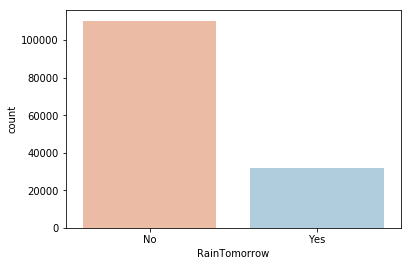

In [4]:
# count target class
sb.countplot(x='RainTomorrow', data=Data_original,  palette = "RdBu")

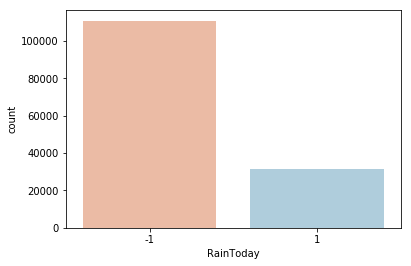

In [16]:
# count target class
sb.countplot(x='RainToday', data=Data_original,  palette = "RdBu")

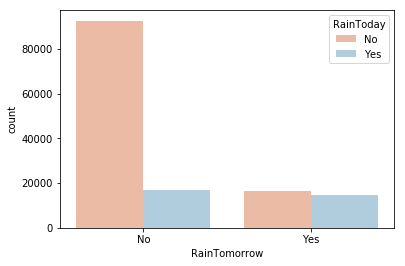

In [5]:
# study relation between rain today and tomorrow
sb.countplot(x='RainTomorrow', data=Data_original, hue='RainToday', palette = "RdBu")

In [6]:
#Data = Data_original
Data_original.RainToday = [1 if each=="Yes" else -1 for each in Data_original.RainToday]
Data_original.RainTomorrow = [1 if each=="Yes" else -1 for each in Data_original.RainTomorrow]
Data_original.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,-1,0.0,-1
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,-1,0.0,-1
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,-1,0.0,-1
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,-1,1.0,-1
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,-1,0.2,-1


In [7]:
#Preparing the data
# We see there are some columns with null values. 
# Before we start pre-processing, let's find out which of the columns have maximum null values
#Missing_value_report = Data.count().sort_values()
#print Missing_value_report
Data_count = pd.DataFrame(Data_original.count().sort_values())
Data_count.columns =  ['Summary']
Data_count

,Summary
Sunshine,74377
Evaporation,81350
Cloud3pm,85099
Cloud9am,88536
Pressure9am,128179
Pressure3pm,128212
WindDir9am,132180
WindGustDir,132863
WindGustSpeed,132923
WindDir3pm,138415


In [8]:
#for i in Data_original.columns:
Missing_Value_Percentage = 100 - ((Data_original.count().sort_values()/len(Data_original))*100)
print "The percentage of missing values in each column is:"
Missing_Value = pd.DataFrame(Missing_Value_Percentage)
Missing_Value.columns =  ['Summary']
Missing_Value

The percentage of missing values in each column is:


,Summary
Sunshine,47.692924
Evaporation,42.789026
Cloud3pm,40.152469
Cloud9am,37.735332
Pressure9am,9.855619
Pressure3pm,9.832411
WindDir9am,7.041838
WindGustDir,6.561504
WindGustSpeed,6.519308
WindDir3pm,2.656952


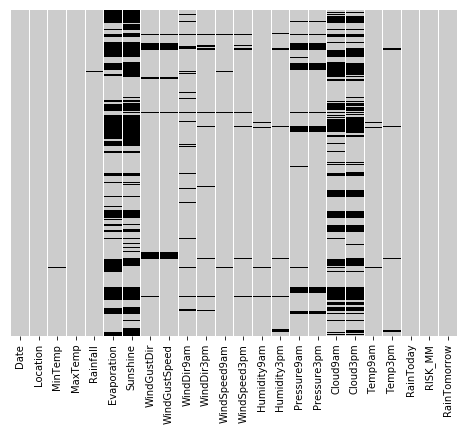

In [9]:
# we can also plot a heatmap to visualize missing values
plt.figure(figsize=(8,6))
sb.heatmap(Data_original.isnull(),yticklabels=False,cbar=False,cmap='nipy_spectral_r')
#plt.savefig('Missing values plot-1.png')

In [10]:
# As we can see the first four columns have less than 60% data, we can ignore these four columns
# We don't need the location column because 
# we are going to find if it will rain in Australia(not location specific)
# We are going to drop the date column too.
# We need to remove RISK_MM because we want to predict 'RainTomorrow' and RISK_MM can leak some info to our model
Data_original = Data_original.drop(['Sunshine','Evaporation','Cloud3pm','Cloud9am','RISK_MM','Location','Date','WindGustDir',
       'WindDir9am', 'WindDir3pm'],axis=1)
Data_original.shape
#Data_original

(142193, 14)

Text(0.5,1,u'Missing values')

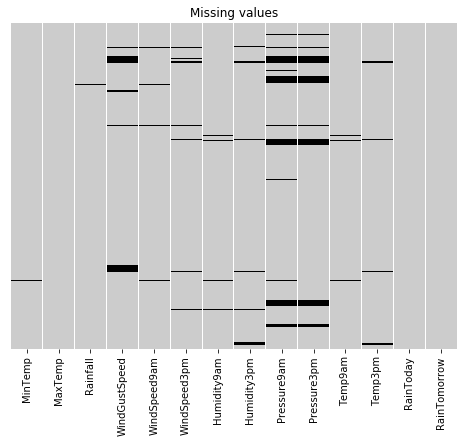

In [11]:
plt.figure(figsize=(8,6))
sb.heatmap(Data_original.isnull(),yticklabels=False,cbar=False,cmap='nipy_spectral_r')
plt.title('Missing values')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 14 columns):
MinTemp          142193 non-null float64
MaxTemp          142193 non-null float64
Rainfall         142193 non-null float64
WindGustSpeed    142193 non-null float64
WindSpeed9am     142193 non-null float64
WindSpeed3pm     142193 non-null float64
Humidity9am      142193 non-null float64
Humidity3pm      142193 non-null float64
Pressure9am      142193 non-null float64
Pressure3pm      142193 non-null float64
Temp9am          142193 non-null float64
Temp3pm          142193 non-null float64
RainToday        142193 non-null int64
RainTomorrow     142193 non-null int64
dtypes: float64(12), int64(2)
memory usage: 15.2 MB


MinTemp          142193
MaxTemp          142193
Rainfall         142193
WindGustSpeed    142193
WindSpeed9am     142193
WindSpeed3pm     142193
Humidity9am      142193
Humidity3pm      142193
Pressure9am      142193
Pressure3pm      142193
Temp9am          142193
Temp3pm          142193
RainToday        142193
RainTomorrow     142193
dtype: int64

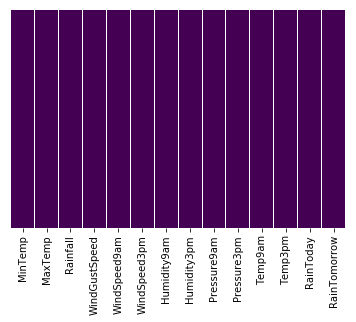

In [12]:
# replace rest of the nulls with respective means
fill_feat = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm',
             'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm','Temp9am', 'Temp3pm',
             'RainToday', 'RainTomorrow']
for i in fill_feat:
    Data_original[i].fillna(np.mean(Data_original[i]),inplace=True)

sb.heatmap(Data_original.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#plt.savefig('Figure 1.png')
Data_original.info()
Data_original.count().sort_values()

In [13]:
print Data_original.columns

Index([u'MinTemp', u'MaxTemp', u'Rainfall', u'WindGustSpeed', u'WindSpeed9am',
       u'WindSpeed3pm', u'Humidity9am', u'Humidity3pm', u'Pressure9am',
       u'Pressure3pm', u'Temp9am', u'Temp3pm', u'RainToday', u'RainTomorrow'],
      dtype='object')


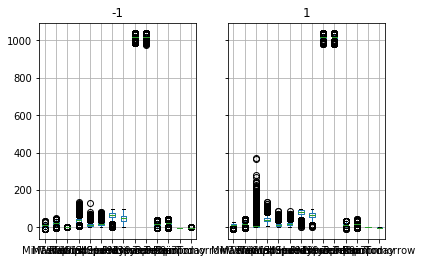

In [14]:
#Statistical Analysis based on Rain-Today
grouped = Data_original.groupby ('RainToday')

grouped.boxplot()
plt.show()
Plot = pd.DataFrame(grouped.describe())
Plot = pd.DataFrame.transpose(Plot)
Plot
Plot.to_excel("WeatherAUS-Analysis_2.xlsx", sheet_name='Statistical analysis') 